# Week 15 - Lark Activity

## Load the dataset into python environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r'Desktop\ICTK\Week 15 Lark Activity\titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Make ‘PassengerId’ as the index column

In [3]:
df1=df.set_index('PassengerId')
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check the basic details of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

## Handling Null Values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df['Age'].median()

28.0

In [10]:
df['Age'].mean()

29.69911764705882

In [11]:
df['Age']=df['Age'].fillna(df['Age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df["Embarked"].fillna(df["Embarked"].mode().iat[0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Handling outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x26be516ffa0>,
 'caps': [<matplotlib.lines.Line2D at 0x26be58176a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26be516fc40>],
 'medians': [<matplotlib.lines.Line2D at 0x26be5817d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x26be5822100>],
 'means': []}

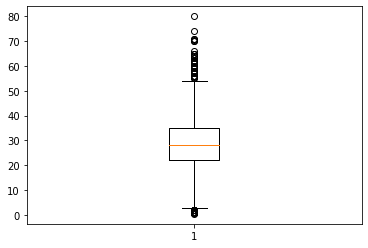

In [13]:
plt.boxplot(df['Age'])

In [14]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

22.0
28.0
35.0
2.5
54.5


In [15]:
outlier=[]
for x in df['Age']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [16]:
ind=df['Age']<low_lim
df.loc[ind].index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [17]:
ind1=df['Age']>up_lim
df.loc[ind1].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [18]:
df.drop([10, 43, 63, 171, 184, 193, 261, 348, 374, 407, 445, 618, 691, 750,
            850, 869],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x26be5935c10>,
 'caps': [<matplotlib.lines.Line2D at 0x26be5942310>,
 'boxes': [<matplotlib.lines.Line2D at 0x26be5935880>],
 'medians': [<matplotlib.lines.Line2D at 0x26be59429d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26be5942d30>],
 'means': []}

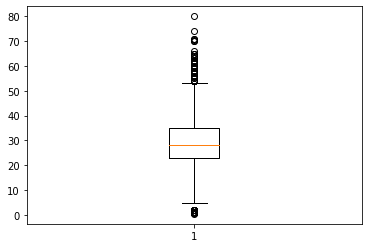

In [19]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26be59a2a30>,
 'caps': [<matplotlib.lines.Line2D at 0x26be59b0130>,
 'boxes': [<matplotlib.lines.Line2D at 0x26be59a26d0>],
 'medians': [<matplotlib.lines.Line2D at 0x26be59b07f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26be59b0b50>],
 'means': []}

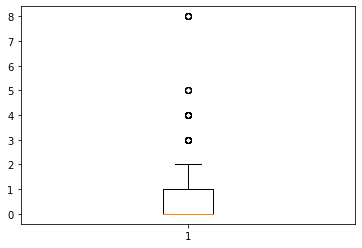

In [20]:
plt.boxplot(df['SibSp'])

In [21]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

0.0
0.0
1.0
-1.5
2.5


In [22]:
outlier=[]
for x in df['SibSp']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 8,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 8]

In [23]:
ind1=df['SibSp']>up_lim
df.loc[ind1].index

Int64Index([  7,  16,  24,  27,  50,  59,  68,  71,  85,  88, 119, 159, 164,
            176, 180, 182, 201, 229, 233, 266, 278, 324, 341, 386, 409, 480,
            485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819, 824,
            846, 863],
           dtype='int64')

In [24]:
df.drop([  7,  16,  24,  27,  50,  59,  68,  71,  85,  88, 119, 159, 164,
            176, 180, 182, 201, 229, 233, 266, 278, 324, 341, 386, 409, 480,
            485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819, 824,
            846, 863],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x26be5a11070>,
 'caps': [<matplotlib.lines.Line2D at 0x26be5a11730>,
 'boxes': [<matplotlib.lines.Line2D at 0x26be5a05cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x26be5a11df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26be5a1d190>],
 'means': []}

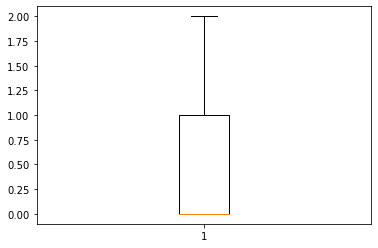

In [25]:
plt.boxplot(df['SibSp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26be5a6f6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26be5a6fd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x26be5a6f370>],
 'medians': [<matplotlib.lines.Line2D at 0x26be5a7b4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26be5a7b820>],
 'means': []}

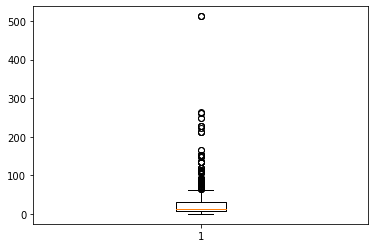

In [26]:
plt.boxplot(df['Fare'])

In [27]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

7.8958
13.0
29.85
-25.0355
62.7813


In [28]:
outlier=[]
for x in df['Fare']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 80.0,
 83.1583,
 89.1042,
 164.8667,
 83.1583]

In [29]:
ind1=df['Fare']>up_lim
df.loc[ind1].index

Int64Index([  1,  31,  34,  52,  61,  62,  72,  97, 102, 118,
            ...
            765, 779, 789, 802, 820, 829, 835, 849, 856, 879],
           dtype='int64', length=108)

In [30]:
df.drop([1, 31, 34, 52, 61, 62, 72, 97, 102, 118, 120, 124, 139, 151, 195, 215, 218, 224, 230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310, 311, 318, 319, 325, 332, 334, 336, 337, 366, 369, 373, 375, 377, 380, 385, 390, 393, 412, 435, 438, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581, 585, 587, 591, 609, 615, 627, 641, 645, 655, 659, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 754, 759, 763, 765, 779, 789, 802, 820, 829, 835, 849, 856, 879],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x26be37cd400>,
 'caps': [<matplotlib.lines.Line2D at 0x26be3899eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26be38a7cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x26be3b7e1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26be3b8a0d0>],
 'means': []}

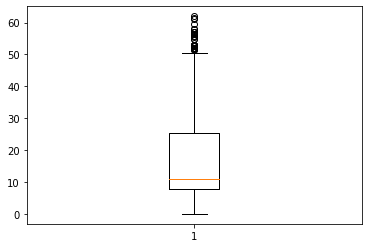

In [31]:
plt.boxplot(df['Fare'])

Notes: Box plot of 'age', 'sibSp' and 'fare' are plotted and identified outliers are removed.

## Feature Reduction and feature engineering


In [32]:
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
5,6,0,3,male,28.0,0,0,8.4583,NaN,Q


### One Hot Encoding

In [33]:
df=pd.get_dummies(df)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,28.0,0,0,8.4583,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Saling on the feature set (‘Survived’ as target)

In [34]:
scaled= MinMaxScaler()
scaled=scaled.fit_transform(df)
col_names=df.columns

scaled_data=pd.DataFrame(scaled,columns=col_names)
scaled_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,0.0,1.0,0.271174,0.5,0.0,0.116975,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.002247,1.0,1.0,0.321438,0.0,0.0,0.127865,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.003371,1.0,0.0,0.434531,0.5,0.0,0.856739,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.004494,0.0,1.0,0.434531,0.0,0.0,0.129882,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.005618,0.0,1.0,0.346569,0.0,0.0,0.136470,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modelling



In [35]:
y=scaled_data['Survived']
X=scaled_data.drop('Survived',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [36]:
models={'RandomForestClassifier':RandomForestClassifier(),
        'LogisticRegression':LogisticRegression(),
        'KNeighborsClassifier':KNeighborsClassifier(),
        'SVC':SVC(),
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'BernoulliNB':BernoulliNB(),
        'GaussianNB':GaussianNB()}

for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+' trained')

RandomForestClassifier trained
LogisticRegression trained
KNeighborsClassifier trained
SVC trained
DecisionTreeClassifier trained
BernoulliNB trained
GaussianNB trained


In [37]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,confusion_matrix
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]
model_conf_mat=[]
#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(X_test)
    model_test_acc.append(accuracy_score(y_test,y_pred))
    model_test_recall_score.append(recall_score(y_test,y_pred,average='weighted'))
    model_test_f1_score.append(f1_score(y_test,y_pred,average='weighted'))
    model_test_precision_score.append(precision_score(y_test,y_pred,average='weighted'))
    model_conf_mat.append(confusion_matrix(y_test,y_pred))
confusion_matrix={'Random Forest':model_conf_mat[0],
                  'Logistic regression':model_conf_mat[1],
                  'KNN':model_conf_mat[2],
                  'SVM':model_conf_mat[3],
                  'DecisionTree':model_conf_mat[4],
                  'BernolliNB':model_conf_mat[5],
                  'GaussianNB':model_conf_mat[6],}
confusion_matrix

{'Random Forest': array([[89, 11],
        [14, 32]], dtype=int64),
 'Logistic regression': array([[80, 20],
        [13, 33]], dtype=int64),
 'KNN': array([[84, 16],
        [16, 30]], dtype=int64),
 'SVM': array([[84, 16],
        [14, 32]], dtype=int64),
 'DecisionTree': array([[80, 20],
        [14, 32]], dtype=int64),
 'BernolliNB': array([[84, 16],
        [14, 32]], dtype=int64),
 'GaussianNB': array([[100,   0],
        [ 41,   5]], dtype=int64)}

In [38]:
Models = ['Random Forest','Logistic regression','KNN','SVM','DecisionTree','BernolliNB','GaussianNB']
model_performance = pd.DataFrame({
    'Model':Models,
    'Accuracy_score':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score})
model_performance

,Model,Accuracy_score,F1_score,Recall_score,Precision_score
0,Random Forest,0.828767,0.827146,0.828767,0.826304
1,Logistic regression,0.773973,0.777865,0.773973,0.785363
2,KNN,0.780822,0.780822,0.780822,0.780822
3,SVM,0.794521,0.795669,0.794521,0.797130
4,DecisionTree,0.767123,0.770651,0.767123,0.776809
5,BernolliNB,0.794521,0.795669,0.794521,0.797130
6,GaussianNB,0.719178,0.630186,0.719178,0.800836


Notes : All the classifiers are almost close to 80 % of accuracy, however Random Forest Classifier is the most accurate among them.